In [1]:
#data
import pandas as pd
import numpy as np

#Plots
import matplotlib.pyplot as plt

#linear regiression nModel Building Library
import sklearn.linear_model


In [2]:
data = pd.read_csv('OutputCleaned_datqathon.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        12906 non-null  int64  
 1   patient_state                     12855 non-null  object 
 2   patient_zip3                      12906 non-null  int64  
 3   patient_age                       12906 non-null  int64  
 4   breast_cancer_diagnosis_code      12906 non-null  object 
 5   metastatic_cancer_diagnosis_code  12906 non-null  object 
 6   Region                            12854 non-null  object 
 7   Division                          12854 non-null  object 
 8   population                        12905 non-null  float64
 9   density                           12905 non-null  float64
 10  age_median                        12905 non-null  float64
 11  age_under_10                      12905 non-null  float64
 12  age_

In [4]:
# Changing the length of the diagnosis codes to make them less specific (keeping them at 4 digits)
data["breast_cancer_diagnosis_code"] = data["breast_cancer_diagnosis_code"].astype(str)
data["metastatic_cancer_diagnosis_code"] = data["metastatic_cancer_diagnosis_code"].astype(str)

data["breast_cancer_diagnosis_code"] = data["breast_cancer_diagnosis_code"].str[:4]
data["metastatic_cancer_diagnosis_code"] = data["metastatic_cancer_diagnosis_code"].str[:3]

# print(traindata[["breast_cancer_diagnosis_code", "metastatic_cancer_diagnosis_code"]])
diagnosis_code_attributes = ["breast_cancer_diagnosis_code", "metastatic_cancer_diagnosis_code"]
diagnosis_code_data = data[diagnosis_code_attributes]
diagnosis_code_data

,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code
0,C509,C79
1,C504,C77
2,C501,C77
3,C502,C77
4,1749,C77
...,...,...
12901,C504,C77
12902,C509,C77
12903,C509,C79
12904,1749,C77


In [5]:
counts = data["breast_cancer_diagnosis_code"].value_counts().reset_index()
counts.columns = ['breast_cancer_diagnosis_code', 'count']
top_10_codes = counts.head(10)
print(top_10_codes)

  breast_cancer_diagnosis_code  count
0                         C509   5019
1                         1749   1982
2                         C504   1913
3                         C508    972
4                         C502    583
5                         C501    430
6                         C505    398
7                         1744    389
8                         C503    314
9                         1748    307


In [6]:
counts = data["metastatic_cancer_diagnosis_code"].value_counts().reset_index()
counts.columns = ['metastatic_cancer_diagnosis_code', 'count']
top_mcodes = counts.head(10)
print(top_mcodes)

  metastatic_cancer_diagnosis_code  count
0                              C77   8218
1                              C79   3497
2                              C78   1191


In [7]:
traindata = data.dropna()

traindata["breast_cancer_diagnosis_code"] = traindata["breast_cancer_diagnosis_code"].astype('category')
traindata["patient_state"] = traindata["patient_state"].astype('category')
traindata["metastatic_cancer_diagnosis_code"] = traindata["metastatic_cancer_diagnosis_code"].astype('category')
traindata["Region"] = traindata["Region"].astype('category')
traindata["Division"] = traindata["Division"].astype('category')

traindata.dtypes
traindata["breast_cancer_diagnosis_code"] = traindata["breast_cancer_diagnosis_code"].cat.codes
traindata["patient_state"] = traindata["patient_state"].cat.codes
traindata["metastatic_cancer_diagnosis_code"] = traindata["metastatic_cancer_diagnosis_code"].cat.codes
traindata["Region"] = traindata["Region"].cat.codes
traindata["Division"] = traindata["Division"].cat.codes

traindata.head()
x= traindata

C:\Users\Payba\AppData\Local\Temp\ipykernel_1704\1733158152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindata["breast_cancer_diagnosis_code"] = traindata["breast_cancer_diagnosis_code"].astype('category')
C:\Users\Payba\AppData\Local\Temp\ipykernel_1704\1733158152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindata["patient_state"] = traindata["patient_state"].astype('category')
C:\Users\Payba\AppData\Local\Temp\ipykernel_1704\1733158152.py:5: SettingWithCopyWarning: 
A value is trying

In [8]:
#x = traindata[['patient_zip3', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
#    'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married',
#    'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median',
#    'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20',
#    'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75',
#    'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure',
#    'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden',
#    'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate',
#    'education_college_or_above', 'education_stem_degree', 'labor_force_participation', 'unemployment_rate', 'self_employed',
#    'farmer', 'race_white', 'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other', 'race_multiple',
#    'hispanic', 'disabled', 'poverty', 'limited_english', 'commute_time', 'health_uninsured', 'veteran', 'Ozone', 'PM25', 'N02']]
y= traindata['DiagPeriodL90D']

In [9]:
testdata = pd.read_csv('kaggleCompTest.csv')
#testdatac = testdata[['home_value', 'income_household_median', 'breast_cancer_diagnosis_code', 'income_individual_median', 'density', 'population',
#    'patient_zip3', 'metastatic_cancer_diagnosis_code']]
testdatac = testdata[['home_value', 'income_household_median', 'breast_cancer_diagnosis_code', 'income_individual_median', 'density', 'population', 'metastatic_cancer_diagnosis_code']]

In [10]:
import sklearn.linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

model = sklearn.linear_model.LogisticRegression(max_iter=41000)
model.fit(x,y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
#Accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.26      0.01      0.01      1224
           1       0.62      0.99      0.76      1982

    accuracy                           0.61      3206
   macro avg       0.44      0.50      0.39      3206
weighted avg       0.48      0.61      0.47      3206



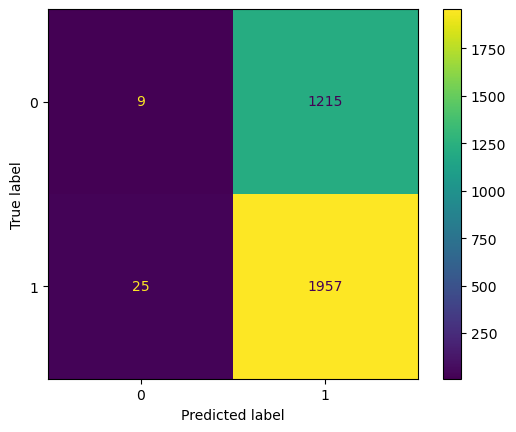

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Users\Payba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [14]:
#Accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.39      0.28      0.33      1224
           1       0.62      0.73      0.67      1982

    accuracy                           0.56      3206
   macro avg       0.51      0.51      0.50      3206
weighted avg       0.54      0.56      0.54      3206



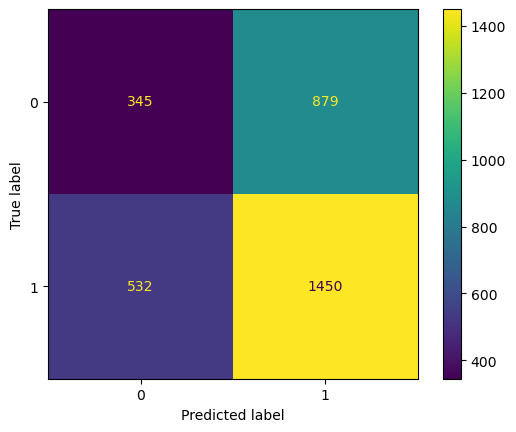

In [15]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

<AxesSubplot:>

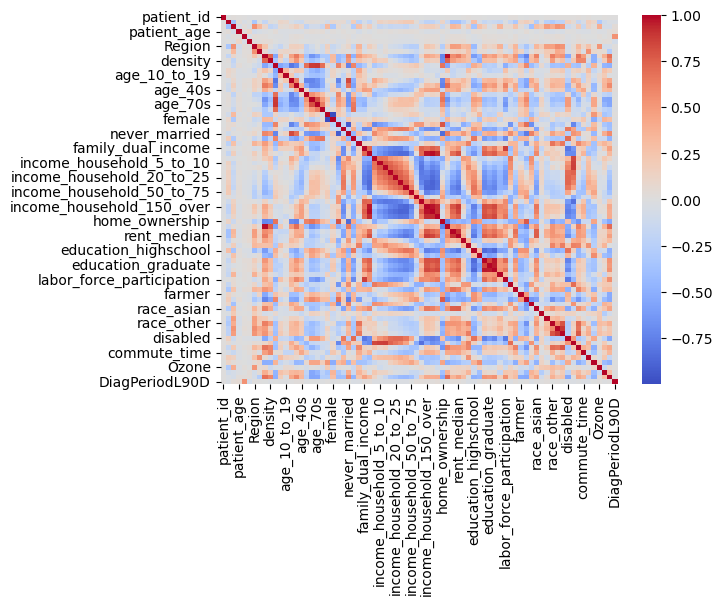

In [16]:
import seaborn as sns

corr_matrix = x.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#X = df.iloc[:,0:20]  #independent columns
#y = df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Column','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                          Column         Score
44                    home_value  2.275756e+06
28       income_household_median  4.708676e+04
41      income_individual_median  2.491030e+04
9                        density  2.113262e+04
4   breast_cancer_diagnosis_code  7.144103e+03
8                     population  4.874399e+03
75                DiagPeriodL90D  4.814000e+03
0                     patient_id  2.707915e+03
2                   patient_zip3  2.408663e+03
45                   rent_median  1.193411e+03


In [18]:
from sklearn.tree import DecisionTreeClassifier
decesionTreeModel = DecisionTreeClassifier(random_state=0)

decesionTreeModel.fit(x, y)

most_features_frame = pd.DataFrame(
    data=decesionTreeModel.feature_importances_,
    columns=["importance"],
    index=x.columns,
).sort_values(by=["importance"], ascending=False)

# print(most_features_frame)
top_5_feature = most_features_frame.index[:5]
top_5_feature_list = [i for i in top_5_feature]
print(top_5_feature_list)

['DiagPeriodL90D', 'education_highschool', 'unemployment_rate', 'labor_force_participation', 'education_stem_degree']


In [19]:
#trainTrimmed = traindata[['home_value', 'income_household_median', 'breast_cancer_diagnosis_code', 'income_individual_median', 'density', 'population',
#    'patient_zip3', 'metastatic_cancer_diagnosis_code']]
trainTrimmed = traindata[['home_value', 'income_household_median', 'breast_cancer_diagnosis_code', 'income_individual_median', 'density', 'population', 'metastatic_cancer_diagnosis_code']]

In [20]:
x=trainTrimmed

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

model = sklearn.linear_model.LogisticRegression(max_iter=41000)
model.fit(x,y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
#Accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.79      0.58      0.67      1186
           1       0.78      0.91      0.84      2020

    accuracy                           0.79      3206
   macro avg       0.79      0.74      0.75      3206
weighted avg       0.79      0.79      0.78      3206



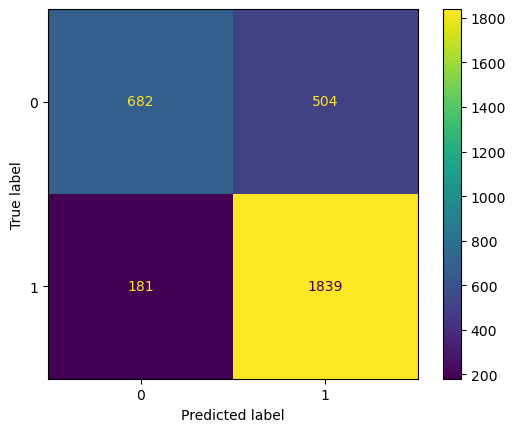

In [23]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Users\Payba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
#Accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.69      0.50      0.58      1186
           1       0.75      0.86      0.80      2020

    accuracy                           0.73      3206
   macro avg       0.72      0.68      0.69      3206
weighted avg       0.73      0.73      0.72      3206



In [26]:
testdatac["breast_cancer_diagnosis_code"] = testdatac["breast_cancer_diagnosis_code"].astype('category')
testdatac["metastatic_cancer_diagnosis_code"] = testdatac["metastatic_cancer_diagnosis_code"].astype('category')

testdatac.dtypes
testdatac["breast_cancer_diagnosis_code"] = testdatac["breast_cancer_diagnosis_code"].cat.codes
testdatac["metastatic_cancer_diagnosis_code"] = testdatac["metastatic_cancer_diagnosis_code"].cat.codes

testdatac.head()
x= testdatac

C:\Users\Payba\AppData\Local\Temp\ipykernel_1704\3820297178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdatac["breast_cancer_diagnosis_code"] = testdatac["breast_cancer_diagnosis_code"].astype('category')
C:\Users\Payba\AppData\Local\Temp\ipykernel_1704\3820297178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdatac["metastatic_cancer_diagnosis_code"] = testdatac["metastatic_cancer_diagnosis_code"].astype('category')
C:\Users\Payba\AppData\Local\Temp\ipykernel_1704\3820297178.py:5: Sett

In [27]:
testdatac.fillna(testdatac.mean(), inplace=True)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric ='minkowski', p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(testdatac).astype(float)

y_pred
fpDF= pd.DataFrame(y_pred)
#patientDF = pd.DataFrame(patientTest[['patient_id']].dropna())
fpDF[['patient_id']] = testdata[['patient_id']].dropna()

C:\Users\Payba\AppData\Local\Temp\ipykernel_1704\1968913907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdatac.fillna(testdatac.mean(), inplace=True)
C:\Users\Payba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
fpDF = fpDF [['patient_id',0]]

In [29]:
display(fpDF.to_string())

'      patient_id    0\n0         573710  1.0\n1         593679  1.0\n2         184532  1.0\n3         447383  1.0\n4         687972  1.0\n5         281312  0.0\n6         492714  1.0\n7         378266  1.0\n8         291550  1.0\n9         612272  1.0\n10        240105  1.0\n11        277939  1.0\n12        504153  0.0\n13        287269  1.0\n14        108727  1.0\n15        598629  1.0\n16        805201  0.0\n17        565624  1.0\n18        689369  0.0\n19        252028  1.0\n20        830503  0.0\n21        777454  0.0\n22        931410  1.0\n23        894910  1.0\n24        257477  1.0\n25        373935  1.0\n26        929645  1.0\n27        164064  1.0\n28        558677  1.0\n29        707003  0.0\n30        289528  1.0\n31        340932  1.0\n32        182933  1.0\n33        887761  0.0\n34        249345  1.0\n35        750357  1.0\n36        162816  1.0\n37        346740  1.0\n38        496264  0.0\n39        900330  1.0\n40        630418  1.0\n41        582166  1.0\n42        

In [30]:
fpDF.rename(columns={0:'DiagPeriodL90D'})

,patient_id,DiagPeriodL90D
0,573710,1.0
1,593679,1.0
2,184532,1.0
3,447383,1.0
4,687972,1.0
...,...,...
5787,977076,1.0
5788,922960,1.0
5789,759690,1.0
5790,911717,1.0


In [31]:
fpDF.to_csv('firstSubmission.csv')

In [32]:
testdatac.isnull().sum()

home_value                          0
income_household_median             0
breast_cancer_diagnosis_code        0
income_individual_median            0
density                             0
population                          0
metastatic_cancer_diagnosis_code    0
dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression
regression = sklearn.linear_model.LogisticRegression(max_iter=3000)

In [34]:
regression.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [35]:
finalDF = regression.predict_proba(testdatac)

In [36]:
finalDF = finalDF[:,1]

In [37]:
submission = pd.DataFrame({'patient_id': testdata['patient_id'],'DiagPeriodL90D': finalDF})
submission

,patient_id,DiagPeriodL90D
0,573710,0.947898
1,593679,0.997350
2,184532,0.997512
3,447383,0.997917
4,687972,0.967861
...,...,...
5787,977076,0.964081
5788,922960,0.997718
5789,759690,0.846113
5790,911717,0.370895


In [38]:
submission.to_csv('secondSubmission.csv')

In [39]:
display(submission.to_string())

'      patient_id  DiagPeriodL90D\n0         573710        0.947898\n1         593679        0.997350\n2         184532        0.997512\n3         447383        0.997917\n4         687972        0.967861\n5         281312        0.169454\n6         492714        0.997067\n7         378266        0.822395\n8         291550        0.996185\n9         612272        0.945262\n10        240105        0.996200\n11        277939        0.394759\n12        504153        0.144573\n13        287269        0.991727\n14        108727        0.642982\n15        598629        0.993468\n16        805201        0.971036\n17        565624        0.993189\n18        689369        0.227101\n19        252028        0.953534\n20        830503        0.256689\n21        777454        0.249587\n22        931410        0.997582\n23        894910        0.758378\n24        257477        0.942687\n25        373935        0.978129\n26        929645        0.898525\n27        164064        0.959208\n28        558

In [40]:
submission.isnull()

,patient_id,DiagPeriodL90D
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5787,False,False
5788,False,False
5789,False,False
5790,False,False
